In [2]:
import pandas as pd
import numpy as np
import datetime
import time

import matplotlib.pyplot as plt

## Data

### Unnormalized

In [22]:
# Read data
df = pd.read_csv('USD_IDR_bloomberg_features_engineered.csv')

df

,date,open,high,low,close,gap_day,next_close,open_change,high_change,low_change,...,open_change_perc,high_change_perc,low_change_perc,close_change_perc,prev_daily_range,daily_range_change,open_prev_close_change,volatility,prev_volatility,volatility_change
0,2012-01-02,9150.0,9200.0,9067.0,9080.0,1,9135.0,50.0,-8.0,4.0,...,0.005495,-0.000869,0.000441,0.001434,145.0,-12.0,83.0,1.453552,1.593407,-0.139855
1,2012-01-03,9090.0,9185.0,9090.0,9135.0,1,9137.0,-60.0,-15.0,23.0,...,-0.006557,-0.001630,0.002537,0.006057,133.0,-38.0,10.0,1.045105,1.453552,-0.408447
2,2012-01-04,9160.0,9185.0,9137.0,9137.0,1,9193.0,70.0,0.0,47.0,...,0.007701,0.000000,0.005171,0.000219,95.0,-47.0,25.0,0.524017,1.045105,-0.521087
3,2012-01-05,9175.0,9203.0,9112.0,9193.0,1,9095.0,15.0,18.0,-25.0,...,0.001638,0.001960,-0.002736,0.006129,48.0,43.0,38.0,0.991826,0.524017,0.467808
4,2012-01-06,9178.0,9213.0,9095.0,9095.0,3,9150.0,3.0,10.0,-17.0,...,0.000327,0.001087,-0.001866,-0.010660,91.0,27.0,-15.0,1.285683,0.991826,0.293858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,2024-10-21,15463.0,15498.0,15431.0,15495.0,1,15560.0,-60.0,-25.0,-16.0,...,-0.003865,-0.001611,-0.001036,0.001940,76.0,-9.0,-2.0,0.433292,0.489596,-0.056304
3130,2024-10-22,15534.0,15572.0,15534.0,15560.0,1,15620.0,71.0,74.0,103.0,...,0.004592,0.004775,0.006675,0.004195,67.0,-29.0,39.0,0.244625,0.433292,-0.188668
3131,2024-10-23,15590.0,15633.0,15590.0,15620.0,1,15584.0,56.0,61.0,56.0,...,0.003605,0.003917,0.003605,0.003856,38.0,5.0,30.0,0.275818,0.244625,0.031193
3132,2024-10-24,15640.0,15644.0,15580.0,15584.0,1,15640.0,50.0,11.0,-10.0,...,0.003207,0.000704,-0.000641,-0.002305,43.0,21.0,20.0,0.409207,0.275818,0.133389


### Normalized

In [23]:
import pandas as pd
from scipy.stats import zscore

# Assuming df is already loaded with the given structure
# Define the columns for independent z-score scaling and the one using 'close' scaling
independent_zscore_cols = [
    'open', 'high', 'low', 'close', 
    'open_change', 'high_change', 'low_change', 'close_change',
    'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 'prev_low',
    'prev_close', 'daily_range', 'gap_change', 'prev_daily_range', 
    'daily_range_change', 'open_prev_close_change'
]

# Calculate z-scores independently for each specified column
df_scaled = df.copy()
scaling_params = pd.DataFrame(columns=['column', 'mean', 'std'])

for col in independent_zscore_cols:
    mean, std = df[col].mean(), df[col].std()
    df_scaled[col] = (df[col] - mean) / std
    scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': [col], 'mean': [mean], 'std': [std]})], ignore_index=True)

# Calculate mean and std for 'close' column to use on 'next_close'
close_mean, close_std = df['close'].mean(), df['close'].std()
df_scaled['next_close'] = (df['next_close'] - close_mean) / close_std

# Add 'next_close' scaling parameters
scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': ['next_close'], 'mean': [close_mean], 'std': [close_std]})], ignore_index=True)

# Output the scaled DataFrame and scaling parameters DataFrame
scaling_params, df_scaled

/tmp/ipykernel_1086701/3368896841.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': [col], 'mean': [mean], 'std': [std]})], ignore_index=True)


(                    column          mean          std
 0                     open  13392.506701  1856.820019
 1                     high  13424.632419  1854.367566
 2                      low  13371.190172  1857.384269
 3                    close  13396.277281  1856.472401
 4              open_change      2.081047    56.256876
 5              high_change      2.053287    54.433314
 6               low_change      2.086790    55.678419
 7             close_change      2.097320    54.904389
 8               ma_close_5  13393.353260  1857.760498
 9              ma_close_10  13389.902724  1859.312209
 10               prev_open  13390.425654  1857.974932
 11               prev_high  13422.579132  1855.472763
 12                prev_low  13369.103382  1858.549521
 13              prev_close  13394.179962  1857.649279
 14             daily_range     53.442246    44.814990
 15              gap_change     -1.673261    32.520599
 16        prev_daily_range     53.475750    44.844177
 17      d

## Machine Learning Models

### Linear Regression

#### for unnormalized data

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
# window_sizes = [400]
window_sizes = list(range(250, 451, 1))

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)
        # Predict on training data
        y_pred_train = model.predict(X_train)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    min_val_rmse = min(all_val_rmse)
    max_val_rmse = max(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    min_val_rmse_perc = min(all_val_rmse_perc)
    max_val_rmse_perc = max(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    min_train_rmse = min(all_train_rmse)
    max_train_rmse = max(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    min_train_rmse_perc = min(all_train_rmse_perc)
    max_train_rmse_perc = max(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'min_val_rmse': min_val_rmse,
        'max_val_rmse': max_val_rmse,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'min_val_rmse_perc': min_val_rmse_perc,
        'max_val_rmse_perc': max_val_rmse_perc,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'min_train_rmse': min_train_rmse,
        'max_train_rmse': max_train_rmse,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'min_train_rmse_perc': min_train_rmse_perc,
        'max_train_rmse_perc': max_train_rmse_perc,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
    })

    # Print results for the current window size
    print(f'Window size {window_size} | Avg Training RMSE: {avg_train_rmse:.3f}, Var RMSE: {var_train_rmse:.3f}')
    print(f'Window size {window_size} | Avg Validation RMSE: {avg_val_rmse:.3f}, Var RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Window size 250 | Avg Training RMSE: 46.619, Var RMSE: 254.893
Window size 250 | Avg Validation RMSE: 43.326, Var RMSE: 8331.635
Window size 251 | Avg Training RMSE: 46.639, Var RMSE: 254.077
Window size 251 | Avg Validation RMSE: 43.280, Var RMSE: 8289.815
Window size 252 | Avg Training RMSE: 46.662, Var RMSE: 253.462
Window size 252 | Avg Validation RMSE: 43.272, Var RMSE: 8307.549
Window size 253 | Avg Training RMSE: 46.683, Var RMSE: 252.706
Window size 253 | Avg Validation RMSE: 43.241, Var RMSE: 8352.890
Window size 254 | Avg Training RMSE: 46.705, Var RMSE: 251.972
Window size 254 | Avg Validation RMSE: 43.250, Var RMSE: 8334.357
Window size 255 | Avg Training RMSE: 46.727, Var RMSE: 251.317
Window size 255 | Avg Validation RMSE: 43.252, Var RMSE: 8344.978
Window size 256 | Avg Training RMSE: 46.746, Var RMSE: 250.518
Window size 256 | Avg Validation RMSE: 43.250, Var RMSE: 8411.573
Window size 257 | Avg Training RMSE: 46.768, Var RMSE: 249.863
Window size 257 | Avg Validation R

,window_size,min_val_rmse,max_val_rmse,avg_val_rmse,var_val_rmse,min_val_rmse_perc,max_val_rmse_perc,avg_val_rmse_perc,var_val_rmse_perc,min_train_rmse,max_train_rmse,avg_train_rmse,var_train_rmse,min_train_rmse_perc,max_train_rmse_perc,avg_train_rmse_perc,var_train_rmse_perc
0,250,0.025211,2381.998260,43.326074,8331.634799,0.000166,15.302090,0.312296,0.382770,16.817682,88.066805,46.619090,254.893226,0.148662,0.608067,0.346241,0.012112
1,251,0.001515,2377.512509,43.279759,8289.814950,0.000011,15.306328,0.311930,0.381195,16.807816,87.419410,46.639040,254.076544,0.148742,0.603651,0.346397,0.012077
2,252,0.037820,2381.524378,43.272313,8307.549423,0.000279,15.307871,0.311823,0.381885,16.801524,87.270939,46.662214,253.461611,0.148742,0.602721,0.346576,0.012050
3,253,0.019059,2385.266691,43.241172,8352.890361,0.000198,15.316953,0.311521,0.383523,16.885664,87.335202,46.682538,252.706246,0.148792,0.603219,0.346733,0.012016
4,254,0.027723,2379.618539,43.250317,8334.357291,0.000205,15.127209,0.311530,0.381781,16.877226,87.036554,46.705065,251.971614,0.149076,0.601225,0.346907,0.011984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,446,0.010477,1324.903381,40.511350,2935.534844,0.000078,8.125749,0.288035,0.135143,26.730938,81.584897,49.982802,143.419775,0.199792,0.610313,0.371908,0.007458
197,447,0.001339,1318.344596,40.501939,2928.437858,0.000009,8.085523,0.287956,0.134895,26.799117,72.546838,49.962244,142.278711,0.200282,0.506842,0.371760,0.007408
198,448,0.004905,1350.163727,40.539467,2951.132690,0.000035,8.280673,0.288220,0.135685,26.844947,77.466303,49.999807,142.152668,0.200603,0.539420,0.372027,0.007397
199,449,0.002953,1350.264116,40.565323,2957.214050,0.000020,8.281289,0.288397,0.135978,26.859987,129.299589,50.032329,144.275584,0.200693,0.894546,0.372261,0.007500


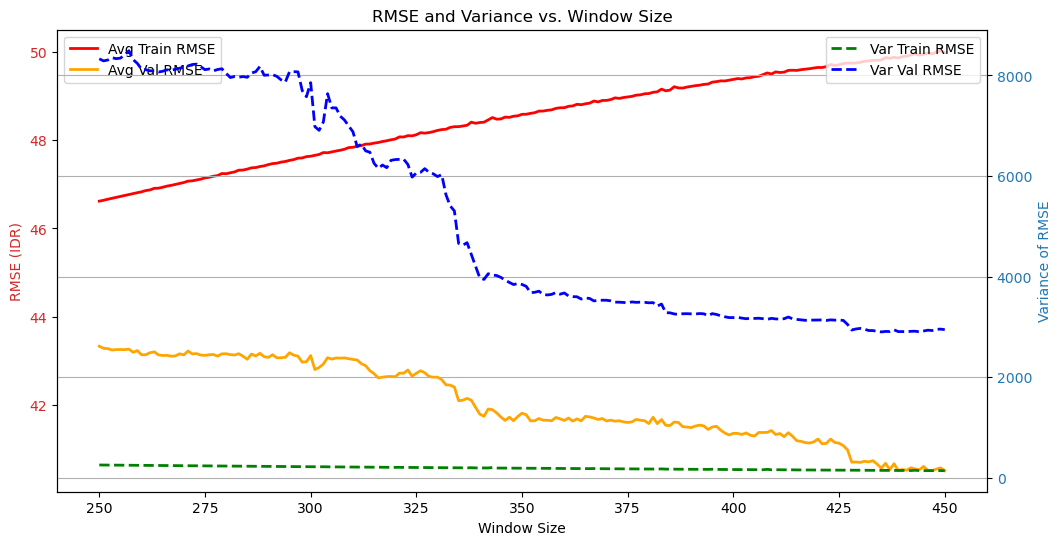

In [25]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (IDR)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

#### for normalized data (z-score method)

In [26]:
# For Z-Score Normalization, use df_scaled instead of df

from sklearn.linear_model import LinearRegression

# Assume close_mean and close_std are the mean and std for 'next_close' calculated during normalization
close_mean, close_std = scaling_params.loc[scaling_params['column'] == 'next_close', ['mean', 'std']].values[0]

# Separate df_scaled into features and target
features_df = df_scaled.drop(['date', 'next_close'], axis=1)
target_df = df_scaled['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
# window_sizes = [400]
window_sizes = list(range(250, 451, 1))

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation and training data
        y_pred_val = model.predict(X_val)
        y_pred_train = model.predict(X_train)

        # Denormalize predictions
        y_pred_val_denorm = (y_pred_val * close_std) + close_mean
        y_pred_train_denorm = (y_pred_train * close_std) + close_mean
        y_val_denorm = (y_val * close_std) + close_mean
        y_train_denorm = (y_train * close_std) + close_mean

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val_denorm - y_pred_val_denorm) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val_denorm)[0] * 100  # Convert to percentage

        # Calculate RMSE and RMSE percentage for training
        mse_train = np.mean((y_train_denorm - y_pred_train_denorm) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train_denorm).mean() * 100  # Convert to percentage

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    min_val_rmse = min(all_val_rmse)
    max_val_rmse = max(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    min_val_rmse_perc = min(all_val_rmse_perc)
    max_val_rmse_perc = max(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    min_train_rmse = min(all_train_rmse)
    max_train_rmse = max(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    min_train_rmse_perc = min(all_train_rmse_perc)
    max_train_rmse_perc = max(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'min_val_rmse': min_val_rmse,
        'max_val_rmse': max_val_rmse,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'min_val_rmse_perc': min_val_rmse_perc,
        'max_val_rmse_perc': max_val_rmse_perc,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'min_train_rmse': min_train_rmse,
        'max_train_rmse': max_train_rmse,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'min_train_rmse_perc': min_train_rmse_perc,
        'max_train_rmse_perc': max_train_rmse_perc,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
    })

    # Print results for the current window size
    print(f'Window size {window_size} | Avg Training RMSE: {avg_train_rmse:.3f}, Var RMSE: {var_train_rmse:.3f}')
    print(f'Window size {window_size} | Avg Validation RMSE: {avg_val_rmse:.3f}, Var RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Window size 250 | Avg Training RMSE: 46.616, Var RMSE: 254.694
Window size 250 | Avg Validation RMSE: 43.316, Var RMSE: 8328.338
Window size 251 | Avg Training RMSE: 46.638, Var RMSE: 254.018
Window size 251 | Avg Validation RMSE: 43.287, Var RMSE: 8288.674
Window size 252 | Avg Training RMSE: 46.659, Var RMSE: 253.314
Window size 252 | Avg Validation RMSE: 43.270, Var RMSE: 8310.151
Window size 253 | Avg Training RMSE: 46.683, Var RMSE: 252.635
Window size 253 | Avg Validation RMSE: 43.231, Var RMSE: 8359.506
Window size 254 | Avg Training RMSE: 46.702, Var RMSE: 251.923
Window size 254 | Avg Validation RMSE: 43.229, Var RMSE: 8334.446
Window size 255 | Avg Training RMSE: 46.723, Var RMSE: 251.224
Window size 255 | Avg Validation RMSE: 43.244, Var RMSE: 8346.501
Window size 256 | Avg Training RMSE: 46.746, Var RMSE: 250.550
Window size 256 | Avg Validation RMSE: 43.241, Var RMSE: 8399.837
Window size 257 | Avg Training RMSE: 46.767, Var RMSE: 249.802
Window size 257 | Avg Validation R

,window_size,min_val_rmse,max_val_rmse,avg_val_rmse,var_val_rmse,min_val_rmse_perc,max_val_rmse_perc,avg_val_rmse_perc,var_val_rmse_perc,min_train_rmse,max_train_rmse,avg_train_rmse,var_train_rmse,min_train_rmse_perc,max_train_rmse_perc,avg_train_rmse_perc,var_train_rmse_perc
0,250,0.030146,2382.068404,43.315776,8328.337979,0.000218,15.302043,0.312229,0.382604,16.813926,87.550543,46.616330,254.694111,0.148662,0.604380,0.346224,0.012104
1,251,0.026744,2377.514693,43.286612,8288.673576,0.000190,15.306010,0.311970,0.381148,16.805453,87.441397,46.638468,254.018192,0.148746,0.603803,0.346393,0.012073
2,252,0.008790,2381.596064,43.270023,8310.151079,0.000065,15.307859,0.311805,0.382013,16.801274,87.270502,46.659355,253.313553,0.148742,0.602718,0.346555,0.012043
3,253,0.044746,2385.369669,43.231102,8359.506480,0.000388,15.371810,0.311459,0.384064,16.884096,87.132192,46.682584,252.635393,0.148805,0.601781,0.346734,0.012013
4,254,0.012860,2379.560695,43.229180,8334.446024,0.000089,15.126900,0.311385,0.381800,16.877162,87.037575,46.702352,251.922811,0.149079,0.601232,0.346889,0.011982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,446,0.001102,1325.132301,40.508244,2937.012657,0.000008,8.127153,0.287997,0.135182,26.730897,72.597331,49.941546,142.550476,0.199792,0.506971,0.371613,0.007420
197,447,0.017528,1318.238254,40.487250,2928.124021,0.000123,8.084871,0.287843,0.134866,26.799178,72.544629,49.949657,142.172149,0.200282,0.506847,0.371669,0.007405
198,448,0.018402,1350.135858,40.501232,2954.009376,0.000138,8.280502,0.287931,0.135840,26.852065,72.682663,49.961955,141.701775,0.200656,0.507763,0.371758,0.007385
199,449,0.009137,1350.118369,40.519336,2957.051522,0.000065,8.280395,0.288046,0.135954,26.860197,72.619987,49.971459,141.289766,0.200695,0.507289,0.371826,0.007367


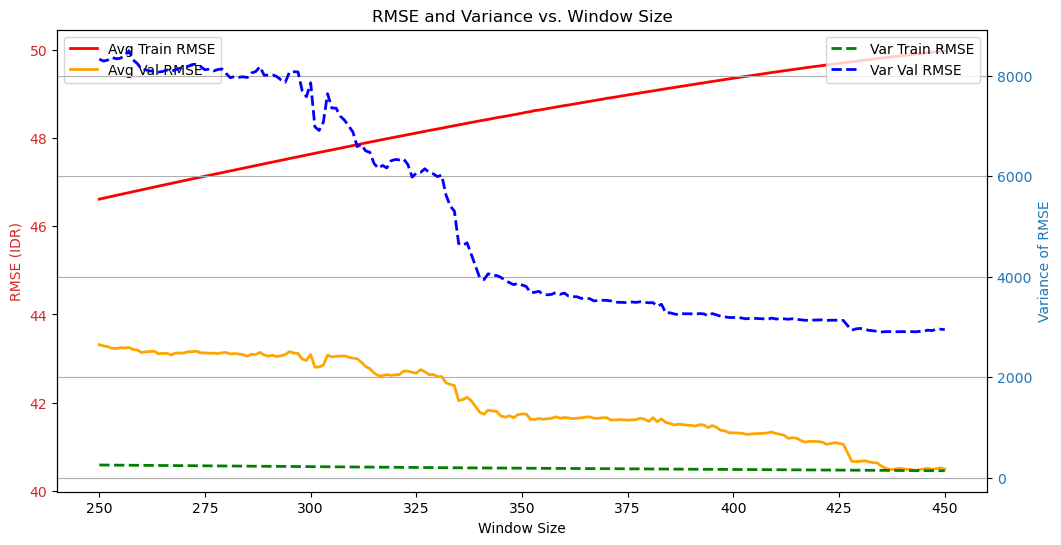

In [27]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (IDR)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

### Other Method

## Deep Learning Models